In [12]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [13]:
from src.image_handler import *
from src.processing import *

## processing

#### Raw image

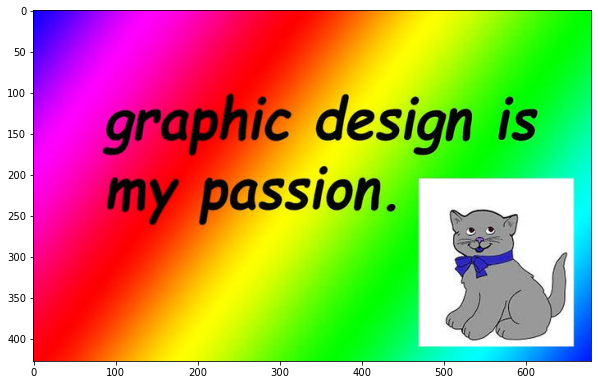

In [14]:
raw = read_image()
show(raw)

### Processing

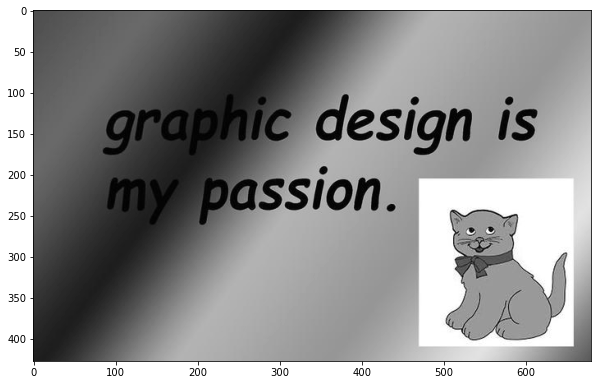

In [15]:
grey = get_greyscale(raw)
gauss = gaussian(grey, 1, 1)

show(gauss)

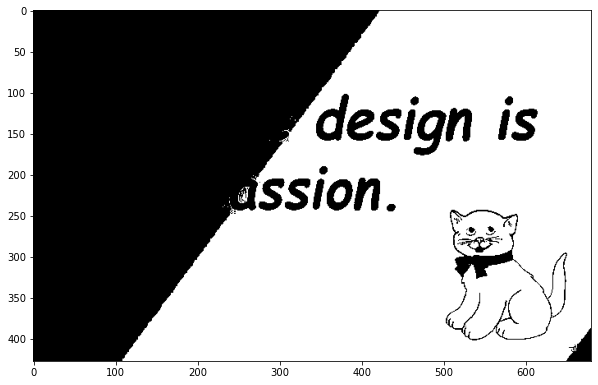

In [16]:
show(thresholding(gauss))

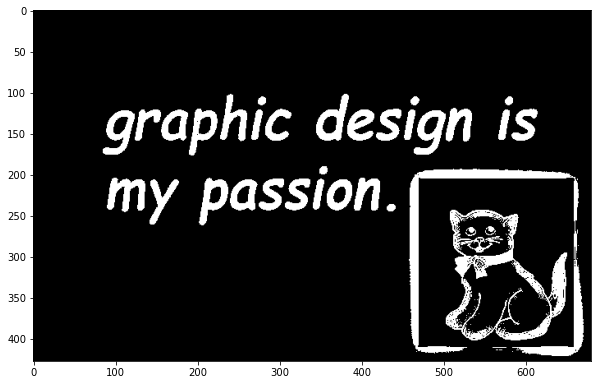

In [17]:
#thres = thresholding(gauss)
thres = gaussian_thresholding(grey)

show(thres)

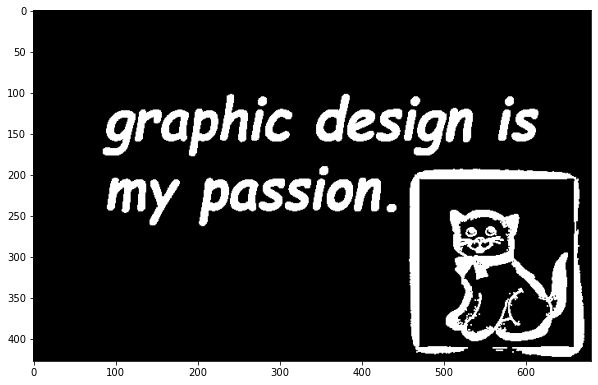

In [18]:
#processed = erode(thres, iterations=2)
processed = thres
processed = dilate(processed, iterations=1)
#processed = erode(processed, iterations=1)

show(processed)

## Character Segmentation

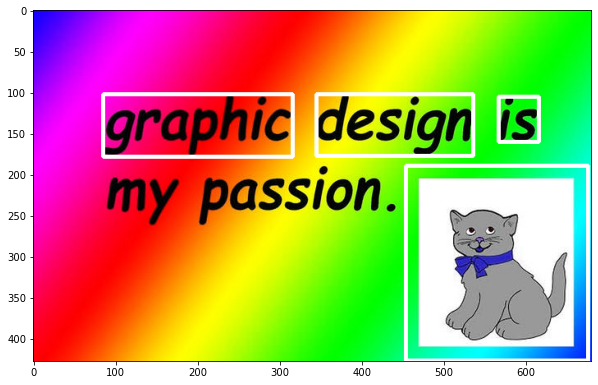

In [19]:
show(get_word_boxes(processed.copy(), (255, 255, 255), raw=raw.copy()))

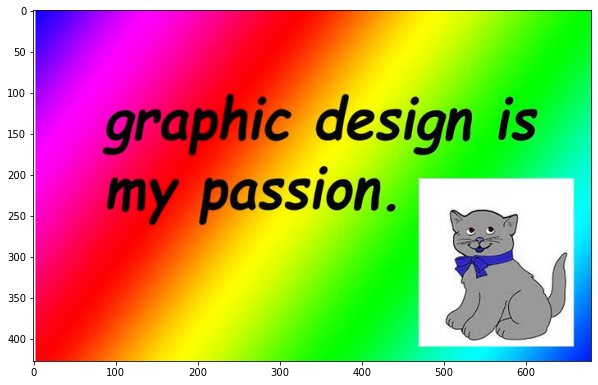

In [20]:
show(get_word_boxes(raw.copy(), (255,255,255)))

In [21]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 3:
        segments.append(crop_img)
        #show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        #print(segment_txt)


## OCRing

In [22]:
raw_text = ocr(raw)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt[0:3:2])

In [23]:
print(raw_text)

In [24]:
print(processed_text)

graphic design is
OA SEIT

 



In [25]:
print(segmented_text)

graphic design is
my passion. [



## Postprocessing

### Raw image text

In [26]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

### Processed image text

In [27]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text, keep_dot_comma=True)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True, keep_o=True)
print(processed_text_pp)

graphic design is OA SEIT 


### Processed and Segmented image text

In [28]:
segmented_text = remove_breaks(segmented_text, add_space=True)
segmented_text = remove_double_spaces(segmented_text)
segmented_text = remove_single_letters(segmented_text)
segmented_text = remove_special(segmented_text)
print(segmented_text)

['graphic design is my passion  ']
